# Titanic - Machine Learning from Disaster
<img src="https://cdn.activestate.com/wp-content/uploads/2021/05/kaggle-titanic-challenge.jpg" width="600"/>


##### The objective of this competition is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

### Main variables 

<div>
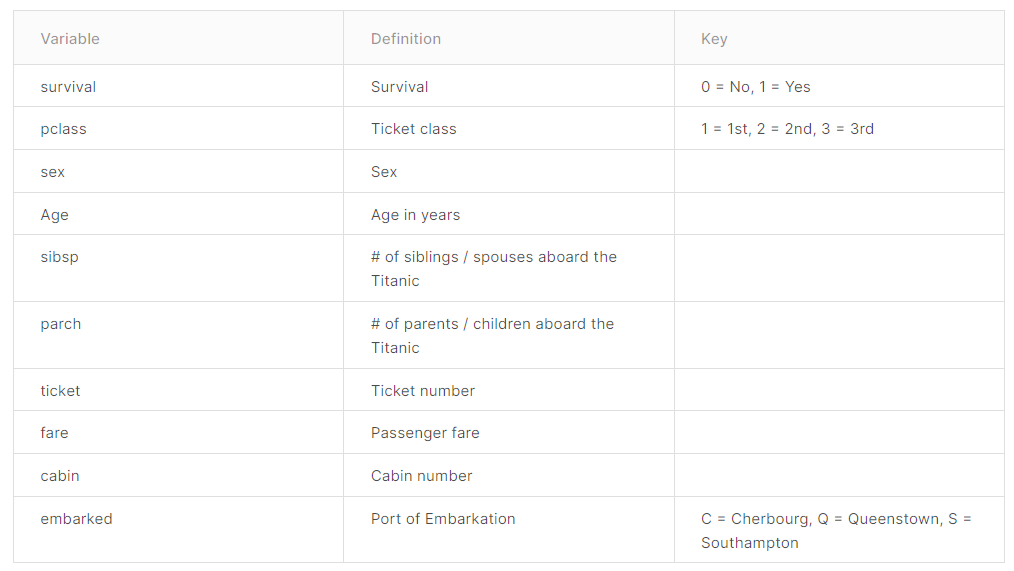
</div>

**Pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**Age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**Sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**Parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

### 1) Import of packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#!pip install -U seaborn

data/test.csv
data/train.csv


In [2]:
pwd

'C:\\Users\\incar\\Documents\\GitHub\\Kaggle_Titanic_Competition'

### 2) Load the data and check structure

In [128]:
train_data = pd.read_csv("data/train.csv", index_col='PassengerId')
test_data = pd.read_csv("data/test.csv", index_col='PassengerId')
train_data.head()
# Test data does not contain the target variable (Survived)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape #check size of the train dataframe

(891, 11)

In [5]:
train_data.info()  #check types of columns and non-null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### 3) Discover and visualize data to gain insights

#### There are missing observations for Age, Cabin and Embarked columns

In [6]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Age, Cabin and Embarked show missing values

In [10]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Age is missing more frequently among not survived passengers

In [11]:
train_data[train_data.Age.isnull()].Survived.value_counts()

0    125
1     52
Name: Survived, dtype: int64

In [13]:
train_data[train_data.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


#### Younger passengers are more likely to survive

Mean age


Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

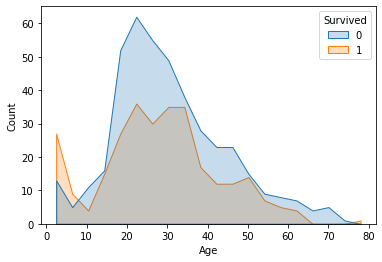

In [15]:
sns.histplot(train_data, x="Age", hue="Survived", element="poly")
print("Mean age")
train_data.groupby('Survived').Age.mean()

In particular, kids younger than 5 are very likely to survive

#### Female passengers are more likely to survive

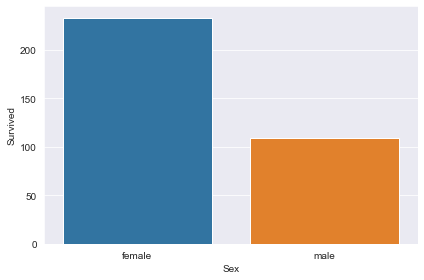

In [16]:
aggr_data = train_data[["Survived", "Sex"]].groupby(by=["Sex"], as_index=False).sum() ## Survived = 1

sns.set_style('darkgrid')
sns.barplot(x=aggr_data["Sex"], y=aggr_data["Survived"])

plt.tight_layout()
plt.show()


In [17]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of people who survived:", "%.2f" % (sum(train_data["Survived"])/len(train_data["Survived"])*100), "%")
print("% of women who survived:", "%.2f" % (rate_women*100), "%")
print("% of men who survived:", "%.2f" % (rate_men*100), "%")

% of people who survived: 38.38 %
% of women who survived: 74.20 %
% of men who survived: 18.89 %


#### Female passengers are on average younger than men

Mean age


Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

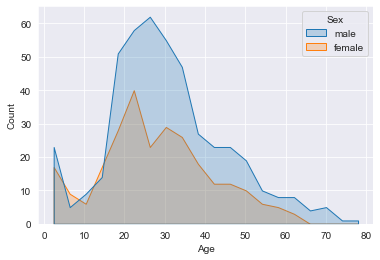

In [18]:
sns.histplot(train_data, x="Age", hue="Sex", element="poly")

print("Mean age")
train_data.groupby('Sex').Age.mean()


#### 3rd class passengers are on average younger

Mean age


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

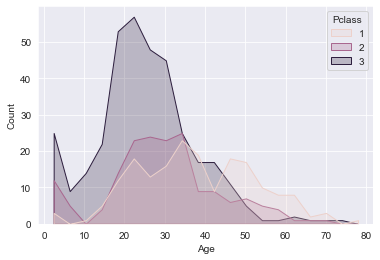

In [141]:
sns.histplot(train_data, x="Age", hue="Pclass", element="poly")

print("Mean age")
train_data.groupby('Pclass').Age.mean()


#### However, 3rd class passengers are less likely to survive. In particular females from the 1st and 2nd class, have a very high change of surviving. Males from the 1st class are a bit less likely to survive than women from the third class

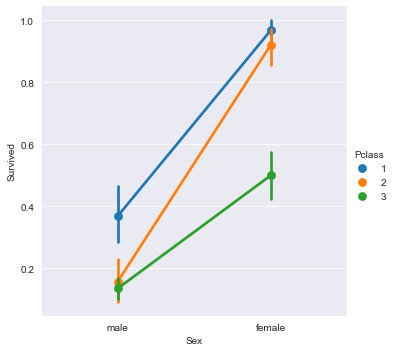

In [19]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="point", data=train_data)

#### Passengers with 1 Spouse or 1 sibling had the highest chances to survive. People with large families are less likely to survive

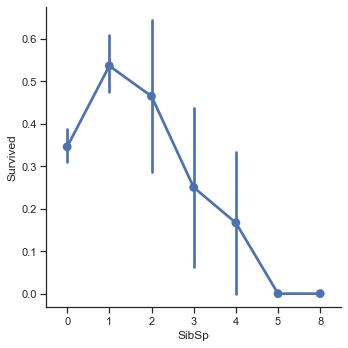

In [30]:
sns.catplot(x="SibSp", y="Survived", kind="point", data=train_data)

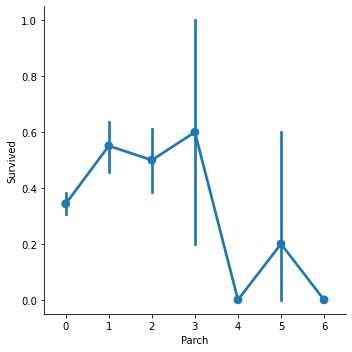

In [16]:
sns.catplot(x="Parch", y="Survived", kind="point", data=train_data)

#### Plot pairwise correlations

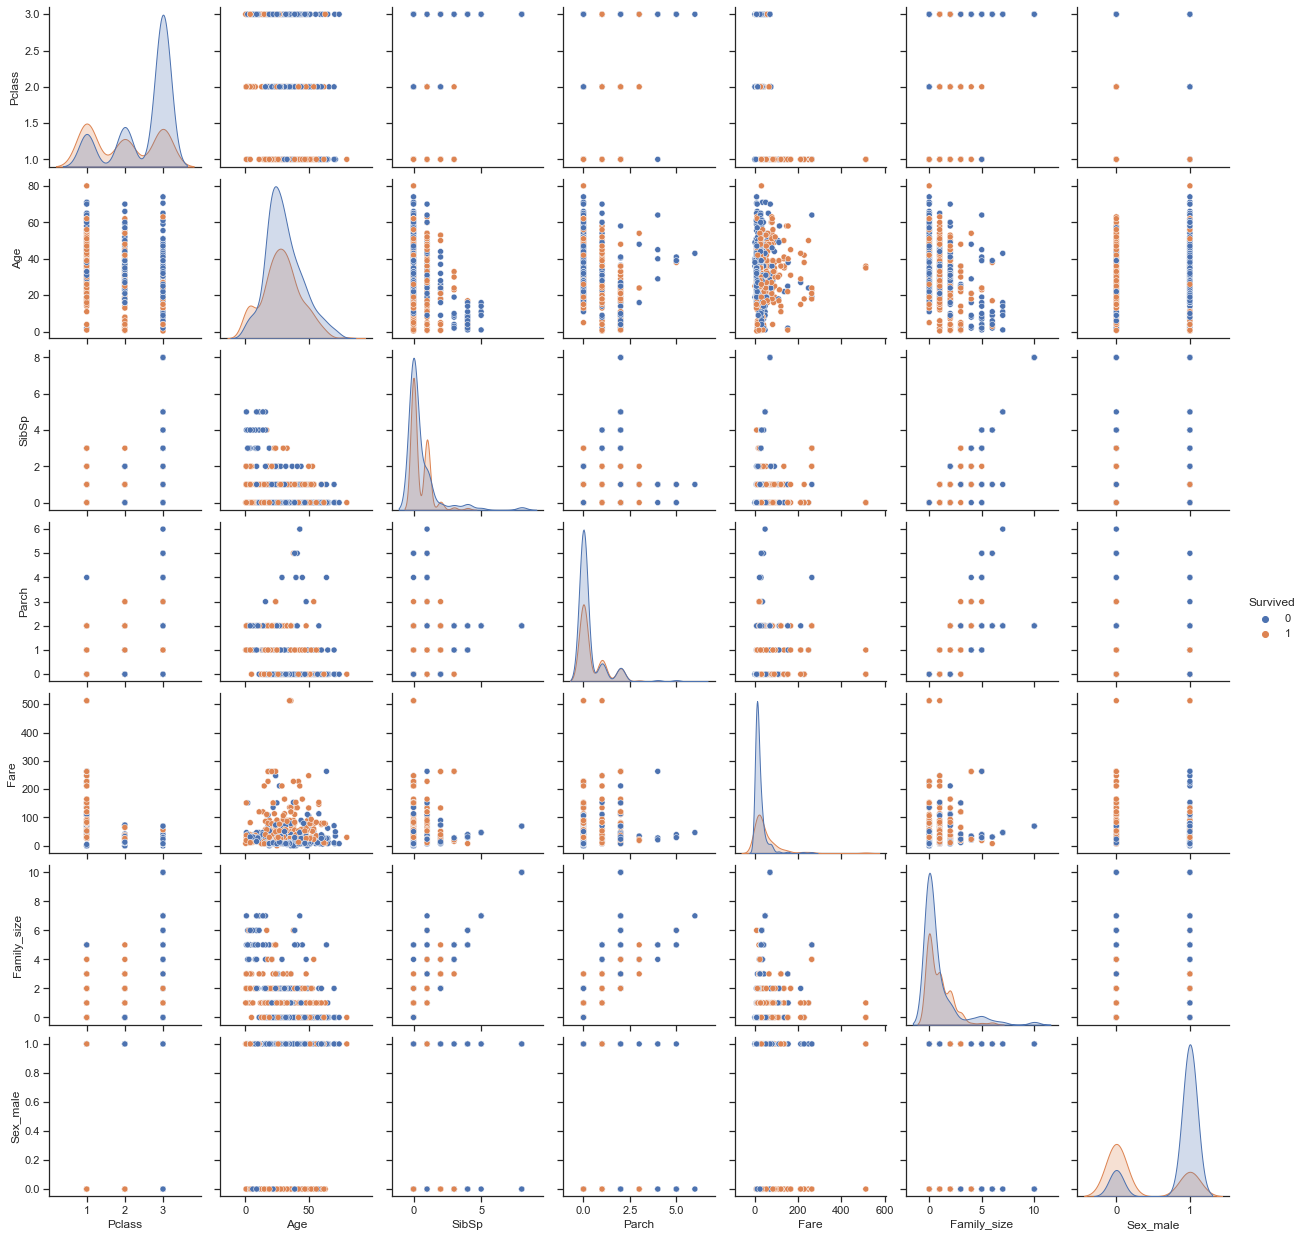

In [23]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(pd.get_dummies(train_data, columns=['Sex'], drop_first=True), hue="Survived")

#### People who embarked in Cherbourg and Southampton paid on average more than in Queenstown

In [19]:
train_data[(train_data["Fare"]<=85) &(train_data["Fare"]>75) ].Embarked.value_counts()

C    16
S    13
Name: Embarked, dtype: int64

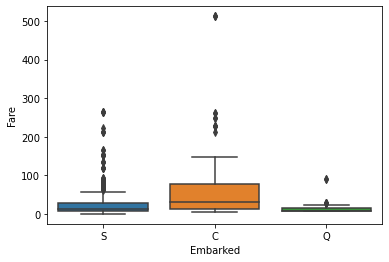

In [20]:
ax = sns.boxplot(x="Embarked", y="Fare", data=train_data)

In [74]:
train_data.groupby(["Embarked", 'Pclass']).Fare.describe()

count        mean        std      min      25%      50%  \
Embarked Pclass                                                            
C        1        85.0  104.718529  99.093935  26.5500  49.5000  78.2667   
         2        17.0   25.358335  11.345067  12.0000  13.8625  24.0000   
         3        66.0   11.214083   4.871528   4.0125   7.2292   7.8958   
Q        1         2.0   90.000000   0.000000  90.0000  90.0000  90.0000   
         2         3.0   12.350000   0.000000  12.3500  12.3500  12.3500   
         3        72.0   11.183393   6.721677   6.7500   7.7500   7.7500   
S        1       127.0   70.364862  58.811278   0.0000  29.2500  52.0000   
         2       164.0   20.327439  13.630741   0.0000  13.0000  13.5000   
         3       353.0   14.644083  13.276609   0.0000   7.8542   8.0500   

                        75%       max  
Embarked Pclass                        
C        1       110.883300  512.3292  
         2        37.004200   41.5792  
         3        14.458300   22.3583  
Q        1        90.000000   90.0000  
         2        12.350000   12.3500  
         3        10.218725   29.1250  
S        1        83.475000  263.0000  
         2        26.000000   73.5000  
         3        16.100000   69.5500

### 4) Prepare the Data for ML algorithms

#### 4.1) Split data in train and test set

In [295]:
from sklearn.model_selection import train_test_split

# Separate target from predictors
y = train_data.Survived
X = train_data.drop(['Survived'], axis=1)

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

X_test = test_data

In [218]:
categorical_cols = [cname for cname in X_train.columns if
                    X_train[cname].nunique() < 50 and 
                    X_train[cname].dtype == "object"]+["Pclass"] # Pclass is cateorical!

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if 
                X_train[cname].dtype in ['int64', 'float64'] and cname not in ["Pclass"]]

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)
print("Target column:", [y_train.name])

Categorical columns: ['Sex', 'Embarked', 'Pclass']
Numerical columns: ['Age', 'SibSp', 'Parch', 'Fare']
Target column: ['Survived']


#### 4.2) Feature engineering

##### Familiy size = Parch + SibSp

In [16]:
#train_data["Family_size"] = train_data["Parch"] + train_data["SibSp"]+1

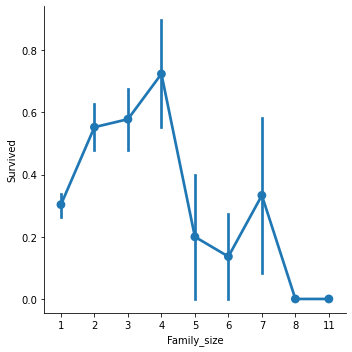

In [17]:
#sns.catplot(x="Family_size", y="Survived", kind="point", data=train_data)

In [241]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_family_size = True):
        self.add_family_size = add_family_size    
    def fit(self, X, y=None):
        return self      
    def transform(self, X):
        X_ = X.copy() # the copy leaves the original dataframe intact
        if self.add_family_size:
            X_["Family_size"] =  X_["Parch"] + X_["SibSp"]+1
            X_.drop(["Sex", "Pclass"], axis=1, inplace = True) #Cabin should also dropped here since many observations are missing
            return X_
        else:
            X_.drop(["Sex", "Pclass"], axis=1, inplace = True)
            return X_

attribs_adder = CombinedAttributesAdder()

##### Derive Name, Surname and marital status

#### 4.3) Data cleaning

In [329]:
from sklearn.pipeline import Pipeline

class AgeGroupMedianImputer(BaseEstimator, TransformerMixin):
    def __init__(self, group_vars):
        self.group_vars = group_vars    
    def fit(self, X, y=None):
        return self      
    def transform(self, X):
        # the copy leaves the original dataframe intact
        X_ = X.copy()
        for col in X_.columns:
            if col == 'Age':
                X_[col] = X_.groupby(self.group_vars)[col].transform(lambda x: x.fillna(x.median()))
            elif X_[col].dtypes == "float64":
                X_[col] = X_.groupby(self.group_vars)[col].transform(lambda x: x.fillna(x.median()))
        return X_

# Preprocessing for numerical data
age_imputer =AgeGroupMedianImputer(group_vars=["Sex", "Pclass"]) #["Sex", 'Pclass']

numerical_transformer = Pipeline(steps=[
    ('age_imputer', age_imputer),
    ('attribs_adder', attribs_adder)
])


#### 4.3) Handling text and categorical Attributes

In [330]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=True))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[('num', numerical_transformer, numerical_cols+["Sex", "Pclass"]),
                  ('cat', categorical_transformer, categorical_cols)
], remainder="drop")

In [331]:
test = pd.DataFrame(preprocessor.fit_transform(X_train))
test.columns = ['Age', 'SibSp', 'Parch', 'Fare', "Family_size", 'Female','Male' ,'Embarked1', 'Embarked2','Embarked3', 'Pclass1', 'Pclass2', 'Pclass3']
test

,Age,SibSp,Parch,Fare,Family_size,Female,Male,Embarked1,Embarked2,Embarked3,Pclass1,Pclass2,Pclass3
0,20.0,0.0,2.0,15.2458,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,31.0,0.0,0.0,10.5000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,31.0,1.0,1.0,37.0042,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,20.0,0.0,0.0,4.0125,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,21.0,0.0,0.0,7.2500,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,39.0,1.0,1.0,83.1583,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
708,19.0,1.0,0.0,7.8542,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
709,26.0,0.0,0.0,7.7333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
710,36.0,1.0,0.0,17.4000,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### 5) Transformation pipelines

In [43]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ["Sex", "Embarked", "Pclass"]

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

oh_enconder_train = OH_encoder.fit_transform(X_train[cat_cols])
oh_enconder_valid = OH_encoder.fit_transform(X_valid[cat_cols])
column_names = OH_encoder.get_feature_names(cat_cols)

OH_cols_train = pd.DataFrame(oh_enconder_train, columns=column_names)
OH_cols_valid = pd.DataFrame(oh_enconder_valid, columns=column_names)

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(cat_cols, axis=1)
num_X_valid = X_valid.drop(cat_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [44]:
OH_X_train.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Family_size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
140,141,"Boulos, Mrs. Joseph (Sultana)",141.0,0,2,2678,15,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
439,440,"Kvillner, Mr. Johan Henrik Johannesson",440.0,0,0,C.A. 18723,10,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
817,818,"Mallet, Mr. Albert",818.0,1,1,S.C./PARIS 2079,37,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
378,379,"Betros, Mr. Tannous",379.0,0,0,2648,4,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
491,492,"Windelov, Mr. Einar",492.0,0,0,SOTON/OQ 3101317,7,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [278]:
X_valid.index

Int64Index([496, 649, 279,  32, 256, 299, 610, 319, 485, 368,
            ...
            501, 223,   2, 426, 761, 781, 838, 216, 834, 373],
           dtype='int64', name='PassengerId', length=179)

### 6) Select and train a model

In [332]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = np.round(clf.predict(X_valid))

print('MAE:', mean_absolute_error(y_valid, preds))

MAE: 0.13966480446927373


### 7) Prepare predictions

In [333]:
X_test_prepared = preprocessor.fit_transform(X_test)

In [334]:
X_test_prepared_df = pd.DataFrame(X_test_prepared, columns = ['Age', 'SibSp', 'Parch', 'Fare', "Family_size", 'Female','Male' ,'Embarked1', 'Embarked2','Embarked3', 'Pclass1', 'Pclass2', 'Pclass3'])

In [335]:
X_test_prepared_df.isnull().sum()

Age            0
SibSp          0
Parch          0
Fare           0
Family_size    0
Female         0
Male           0
Embarked1      0
Embarked2      0
Embarked3      0
Pclass1        0
Pclass2        0
Pclass3        0
dtype: int64

In [342]:
final_predictions = np.round(model.predict(X_test_prepared))

In [343]:
final_predictions

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [22]:

from sklearn.ensemble import RandomForestClassifier

y = y_train

features = ['Sex_female', "Fare", 'Family_size', "Age"]

X = OH_X_train[features]
X_test =  OH_X_valid[features]

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\incar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\incar\AppData\Local\Temp/ipykernel_26080/3278081353.py", line 3, in <module>
    y = y_train
NameError: name 'y_train' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\incar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\incar\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\incar\Anaconda3\lib\

TypeError: object of type 'NoneType' has no len()

In [341]:

output = pd.DataFrame({'PassengerId': X_test.index, 'Survived': final_predictions})
output.to_csv('submissions/my_submission_pipeline.csv', index=False)
print("New submission successfully saved!")

New submission successfully saved!
